# **PCA and LDA on Fischer Faces Dataset**

Performed Principal Component Analysis (PCA) to reduce the dimensionality from **10201** to **K** for high-dimensional data, and then performed Linear Discriminant Analysis (LDA) to **further** reduce it to one dimension.

## **Libraries Used**
- **NumPy** - for numerical computations such as `eig()`, and `dot()` operations.
- **Pillow** - to read the `.gif` file.
- **Matplotlib** - to plot the graph.
- **tarfile** - to extract files
-**OS** - to make directories




In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tarfile
import os








In [ ]:
#extracting files


tar_gz_file = '/content/drive/MyDrive/MLSP_assignment/Data.tar.gz'


with tarfile.open(tar_gz_file, 'r:gz') as tar:
    tar.extractall('extracted_files')

print("Extracted files:")
!ls extracted_files


Extracted files:
Data


In [ ]:



image_dir_train = '/content/extracted_files/Data/emotion_classification/train'
image_dir_test = '/content/extracted_files/Data/emotion_classification/test'


image_files_train = os.listdir(image_dir_train)
image_files_test = os.listdir(image_dir_test)
y_train=[]
y_test=[]
for i in image_files_train:
  label = i.split('.')[1]
  if label == 'happy':


    y_train.append(1)
  elif label == 'sad':

    y_train.append(0)
y_train = np.array(y_train)




for i in image_files_test:
  label = i.split('.')[1]
  if label == 'happy':


    y_test.append(1)
  elif label == 'sad':

    y_test.append(0)
y_test = np.array(y_test)








In [ ]:




image_files_train = [f for f in os.listdir(image_dir_train) if f.endswith('.gif')]
image_files_test = [f for f in os.listdir(image_dir_test) if f.endswith('.gif')]


image_train = []
for img_file in image_files_train:
    img_path = os.path.join(image_dir_train, img_file)
    img = Image.open(img_path)
    image_train.append(np.array(img))
image_test=[]
for img_file in image_files_test:
    img_path = os.path.join(image_dir_test, img_file)
    img = Image.open(img_path)
    image_test.append(np.array(img))





In [ ]:
for i in range(len(image_train)):
  image_train[i] = image_train[i].flatten()
X_train=np.vstack(image_train)
for i in range(len(image_test)):
  image_test[i] = image_test[i].flatten()
X_test=np.vstack(image_test)

print(X_train.shape)
print(X_test.shape)











(20, 10201)
(10, 10201)


In [ ]:

def PCA(x,n_components_pca):
  mean=np.mean(X_train,axis=0)
  x_centered=X_train-mean
  cov_mat=np.dot(x_centered,x_centered.T)/x_centered.shape[0]
  eig_val,eig_vec=np.linalg.eig(cov_mat)
  sorted_indices = np.argsort(eig_val)[::-1]
  sorted_eig_val = eig_val[sorted_indices]
  sorted_eig_vec = eig_vec[:, sorted_indices]
  evec=sorted_eig_vec[:,:n_components_pca]
  evec_org=np.dot(x_centered.T,evec)
  for i in range (evec.shape[1]):
    evec_org[:,i]=evec_org[:,i]/np.sqrt(evec.shape[0]*sorted_eig_val[i])
  x_reduced=np.dot(evec_org.T,(x-mean).T)
  return x_reduced


In [ ]:
def LDA(x,n_components,x_train,y_train):
  m0_x=0
  m1_x=0
  for i in range(len(y_train)):
    if y_train[i]==1:
      m1_x+=x_train[:,i]
    else:
      m0_x+=x_train[:,i]
  m0_x=m0_x/len(y_train[y_train==0])
  m1_x=m1_x/len(y_train[y_train==1])
  S_B=np.outer(m1_x-m0_x,m1_x-m0_x)
  S_W=0
  for i in range(len(y_train)):
    if y_train[i]==1:
      S_W+=np.outer(x_train[:,i]-m1_x,x_train[:,i]-m1_x)
    else:
      S_W+=np.outer(x_train[:,i]-m0_x,x_train[:,i]-m0_x)
  Q=np.dot(np.linalg.inv(S_W),S_B)
  eig_val,eig_vec=np.linalg.eig(Q)
  sorted_index=np.argsort(eig_val)[::-1]
  sorted_eig_val=eig_val[sorted_index]
  sorted_eig_vec=eig_vec[:,sorted_index]
  vec=sorted_eig_vec[:,n_components-1]
  x_reduced=np.dot(vec.T,x)
  return x_reduced

def accuracy_fn(x_test,y_test,threshold):

  y_res=[]
  for i in range(len(x_test)):
    if x_test[i].real<threshold:
      y_res.append(0)
    else:
      y_res.append(1)
  #accuracy
  count=0
  for i in range(len(y_res)):
    if y_res[i]==y_test[i]:
      count+=1
  accuracy=count/len(y_test)
  return accuracy


def separability(x,y):
  m0_x=0
  m1_x=0
  for i in range(len(y)):
    if y[i]==1:
      m1_x+=x[i]
    else:
      m0_x+=x[i]
  m0_x=m0_x/len(y[y==0])
  m1_x=m1_x/len(y[y==1])
  S_B=(m1_x-m0_x)**2
  S_W=0
  for i in range(len(y_train)):
    if y_train[i]==1:
      S_W+=(x[i]-m1_x)**2
    else:
      S_W+=(x[i]-m0_x)**2
  return (S_B/S_W).real













In [ ]:
#In this code i have find the number of components to which PCA should reduce the dimension for maximum separability of train data
maximum_separability=0
n_components=0
for i in range(2,20):
  x_train_reduced=PCA(X_train,i)
  x_lda=LDA(x_train_reduced,1,x_train_reduced,y_train)
  if separability(x_lda,y_train)>maximum_separability:
    maximum_separability=separability(x_lda,y_train)
    n_components=i
print(f"maximum separability:{maximum_separability}")
print(f"n_components:{n_components}")









maximum separability:4.645457055803584
n_components:18


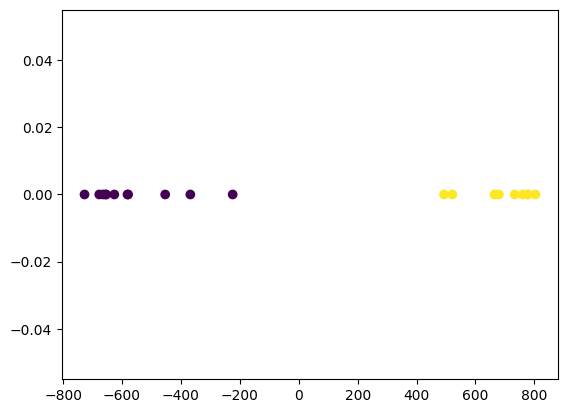

(array([ 777.45457597+0.j, -654.5248206 +0.j, -224.32195644+0.j,
        -626.08083353+0.j,  679.31511337+0.j, -727.25322667+0.j,
        -663.96688781+0.j,  776.19994977+0.j,  493.43314737+0.j,
        -581.40113302+0.j,  733.15552173+0.j, -677.25527517+0.j,
         521.46330256+0.j,  760.31368122+0.j, -579.33391156+0.j,
        -453.41616573+0.j,  664.73412279+0.j, -654.03214817+0.j,
         803.51205065+0.j, -367.99510672+0.j]),
 array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([ 777.45457597+0.j, -654.5248206 +0.j, -224.32195644+0.j,
        -626.08083353+0.j,  679.31511337+0.j, -727.25322667+0.j,
        -663.96688781+0.j,  776.19994977+0.j,  493.43314737+0.j,
        -581.40113302+0.j,  733.15552173+0.j, -677.25527517+0.j,
         521.46330256+0.j,  760.31368122+0.j, -579.33391156+0.j,
        -453.41616573+0.j,  664.73412279+0.j, -654.03214817+0.j,
         803.51205065+0.j, -367.99510672+0.j]),
 array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0

In [ ]:
#As we can see that maximum separability is  possible with K=18
x_train_reduced=PCA(X_train,18)
x_lda=LDA(x_train_reduced,1,x_train_reduced,y_train)
plt.scatter(x_lda,[0]*len(x_lda),c=y_train)
plt.show()
(x_lda,y_train,x_lda,y_train)


0.8


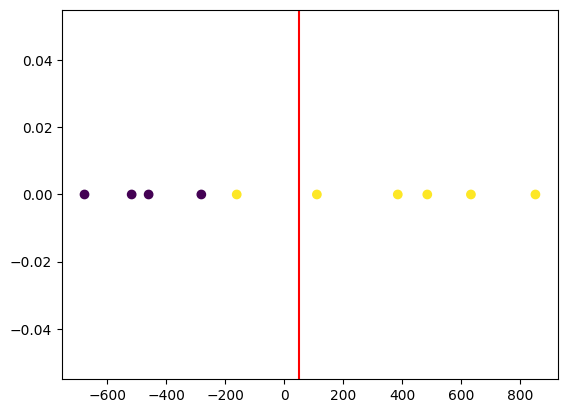

In [ ]:
#threshold=50

x_test_reduced=PCA(X_test,18)
x_test_lda=LDA(x_test_reduced,1,x_train_reduced,y_train)


print(accuracy_fn(x_test_lda,y_test,200))
plt.scatter(x_test_lda,[0]*len(x_test_lda),c=y_test)
plt.axvline(x = 50, color = 'r', linestyle = '-')
plt.show()

